In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Sample - Superstore.xls')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.shape

(9994, 21)

In [4]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Analyse the Sales column

In [5]:
data['Sales'].min()

0.44399999999999995

In [6]:
data['Sales'].max()

22638.48

In [7]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<Axes: xlabel='Sales', ylabel='Count'>

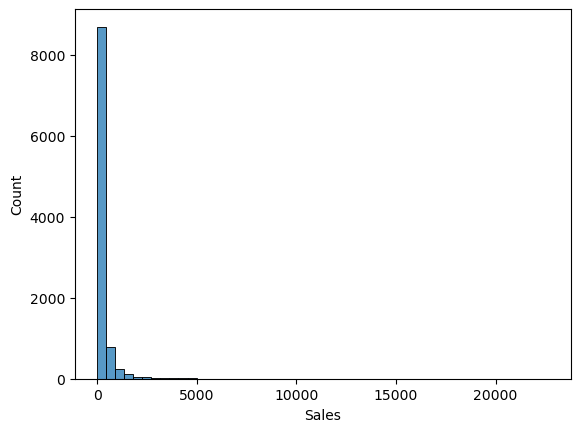

In [8]:
sns.histplot(x = data['Sales'], bins = 50)

### Analyze the profit column

<Axes: xlabel='Profit', ylabel='Count'>

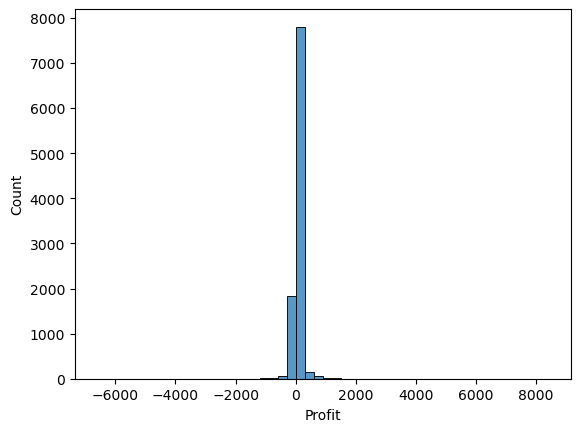

In [9]:
sns.histplot(x = data['Profit'], bins = 50)

In [10]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### For Sales or Profit, hisplot() but you can also create distplot() or kdeplot() 

### Count of products belonging to different categories

<Axes: xlabel='Category', ylabel='count'>

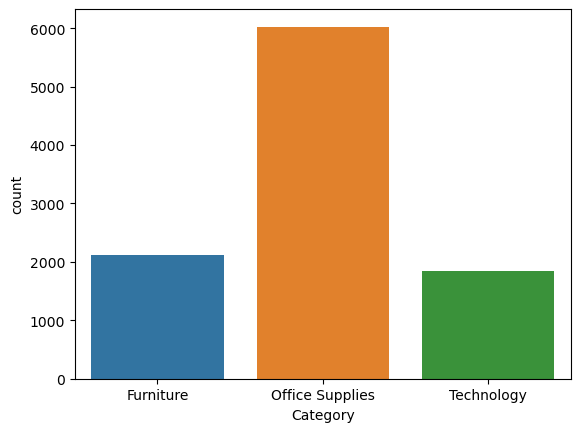

In [11]:
sns.countplot(x = data['Category'])

In [12]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

### Count how many regions in the data

<Axes: xlabel='Region', ylabel='count'>

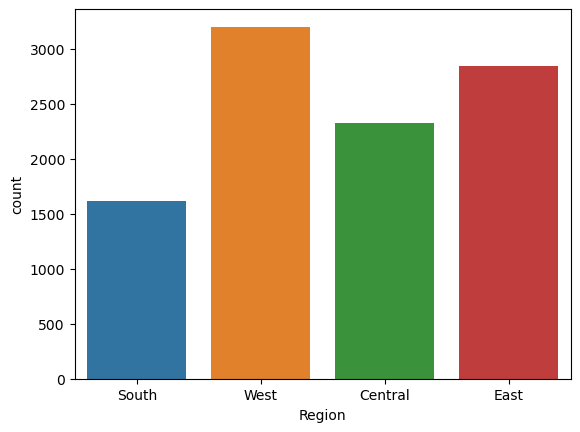

In [13]:
sns.countplot(x = data['Region'])

## Observations:

1. Max orders are delivered in the West Region
2. South Region has the minimum orders

## Which Region has the highest Profit?


<Axes: xlabel='Region', ylabel='Profit'>

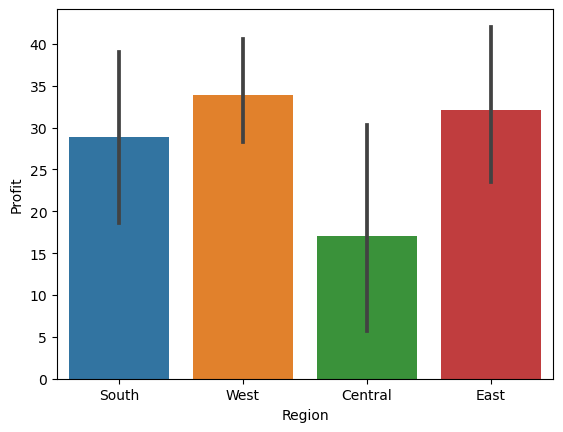

In [14]:
sns.barplot(x = data['Region'], y = data['Profit'])

## Observation:

1. West Region highest profit
2. Central Region lowest profit

## Category wise highest Profit in which Region?

<Axes: xlabel='Region', ylabel='Profit'>

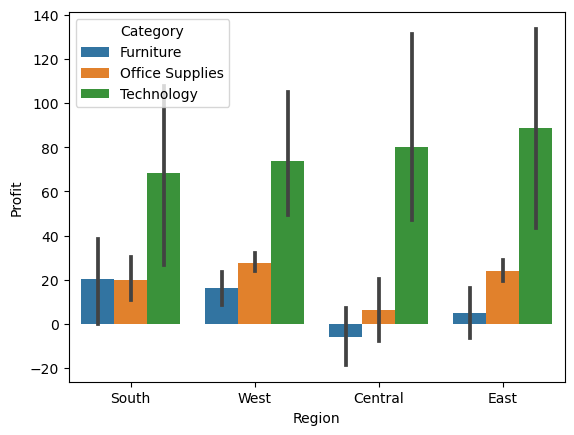

In [15]:
sns.barplot(x = data['Region'], y = data['Profit'], hue = data['Category'])

## Observations:

1. Central Region has some products where profits are negative
2. Technology products are generating the highest profits in all the regions
3. Furniture is the least profit generating product in all regions except South


#### Looking at Furniture and Office Supplies Profits in Central we can think of stopping the sales of these products
#### More Offers, More options and More varity for Technology as it is generating highest profit in all regions 

## Understand the relation between sales and profit?

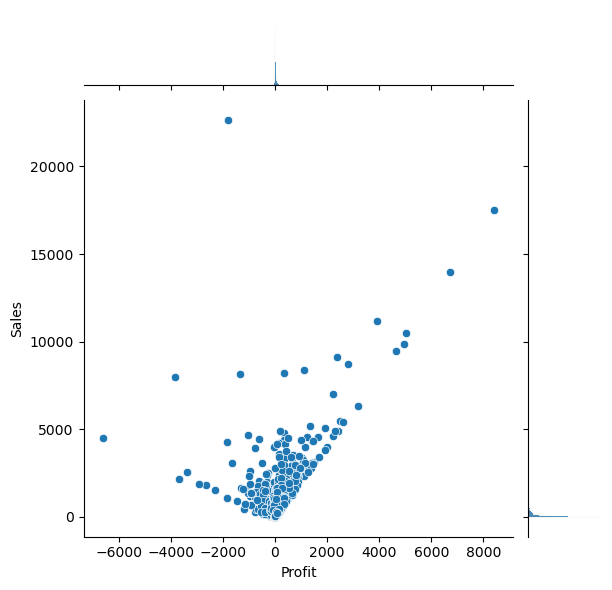

In [16]:
sns.jointplot(x = 'Profit', y = 'Sales', data = data, kind = 'scatter')

<Axes: xlabel='Profit', ylabel='Sales'>

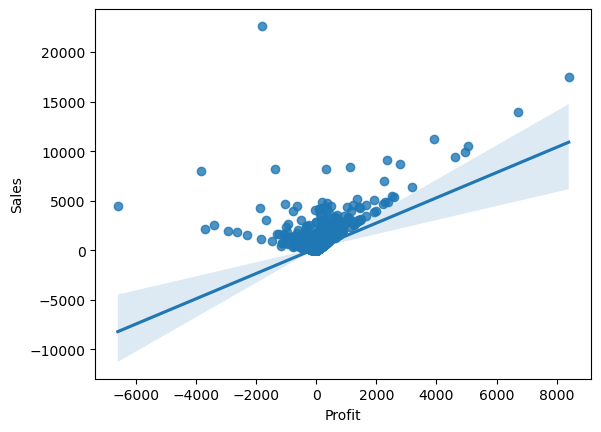

In [17]:
sns.regplot(x = data['Profit'], y = data['Sales'])

<Axes: xlabel='Profit', ylabel='Sales'>

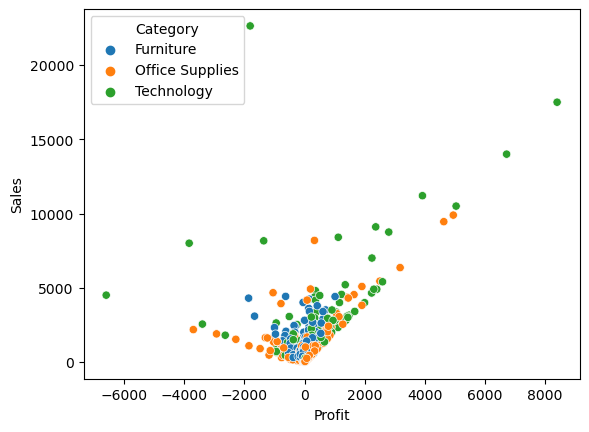

In [18]:
sns.scatterplot(x = data['Profit'], y = data['Sales'], hue = data['Category'])

<Axes: xlabel='Profit', ylabel='Sales'>

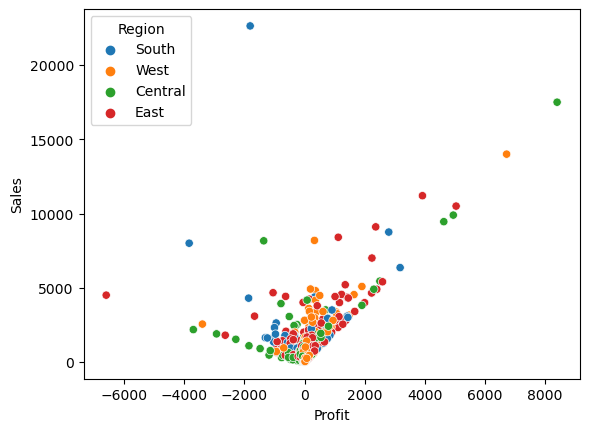

In [19]:
sns.scatterplot(x = data['Profit'], y = data['Sales'], hue = data['Region'])

### Story

1. Even though Technology products are leading in profit. There are certain products in technology which generate negative profits and these negative profit generating technology are specifically being sold from South region and East region

In [20]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [21]:
## Sales and profit trend 

In [22]:
data = pd.read_excel('Sample - Superstore.xls', parse_dates = ['Order Date'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

<Axes: xlabel='Order Date', ylabel='Profit'>

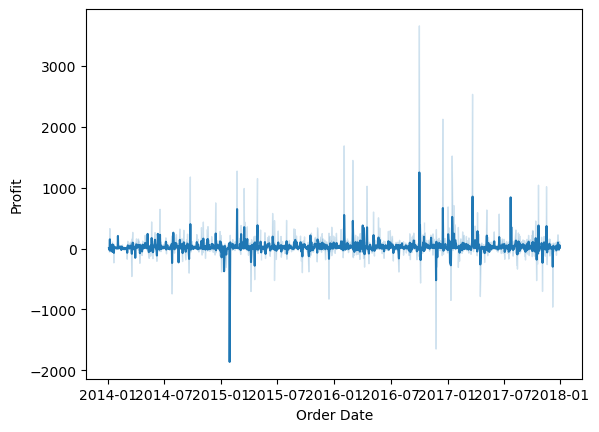

In [24]:
sns.lineplot(x = data['Order Date'], y = data['Profit'])

## Extract the year and month from the Order Date and Create 2 new columns in the data 

In [25]:
data['Order Year'] = pd.DatetimeIndex(data['Order Date']).year
data['Order Month'] = pd.DatetimeIndex(data['Order Date']).month

In [26]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10


<Axes: xlabel='Order Year', ylabel='Profit'>

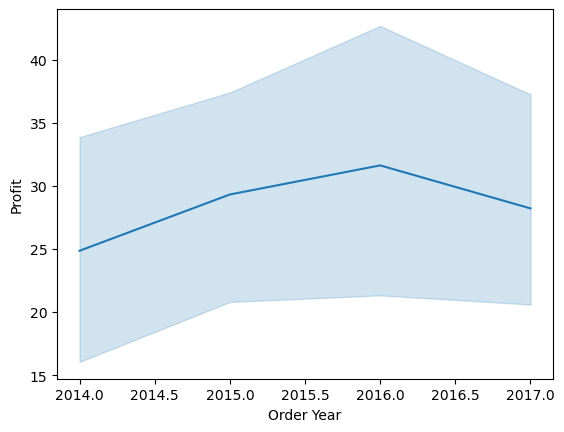

In [27]:
sns.lineplot(x = data['Order Year'], y = data['Profit'])

<Axes: xlabel='Order Month', ylabel='Profit'>

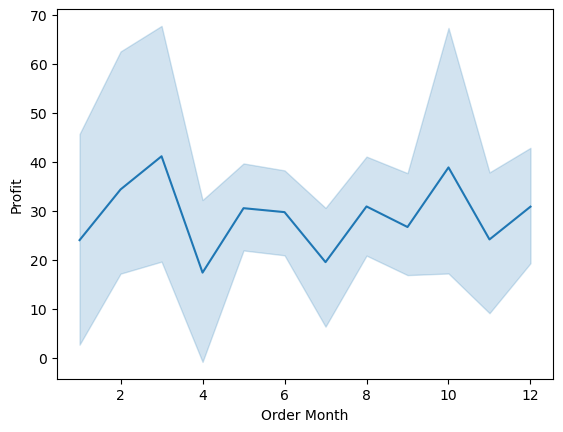

In [28]:
sns.lineplot(x = data['Order Month'], y = data['Profit'])

<Axes: xlabel='Order Year', ylabel='Sales'>

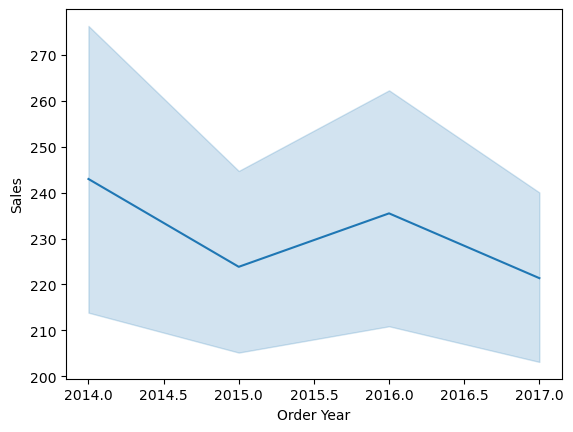

In [29]:
sns.lineplot(x = data['Order Year'], y = data['Sales'])

<Axes: xlabel='Order Month', ylabel='Sales'>

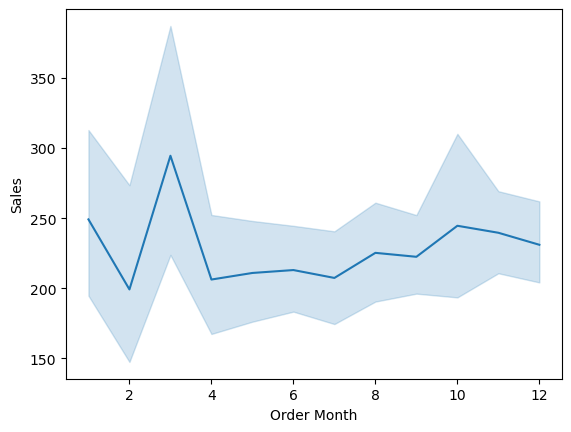

In [30]:
sns.lineplot(x = data['Order Month'], y = data['Sales'])

In [31]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Month'],
      dtype='object')

<Axes: xlabel='Region', ylabel='Quantity'>

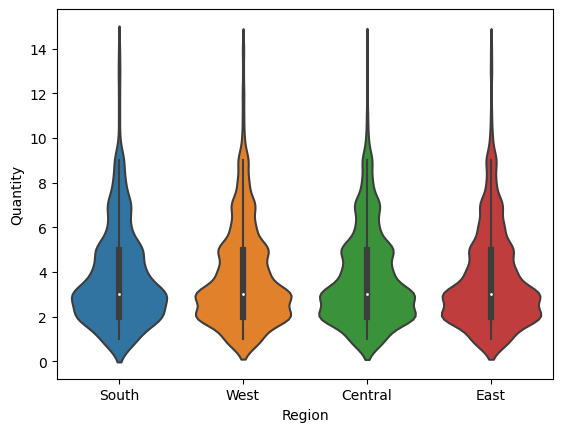

In [32]:
sns.violinplot(x = data['Region'], y = data['Quantity'])

<Axes: >

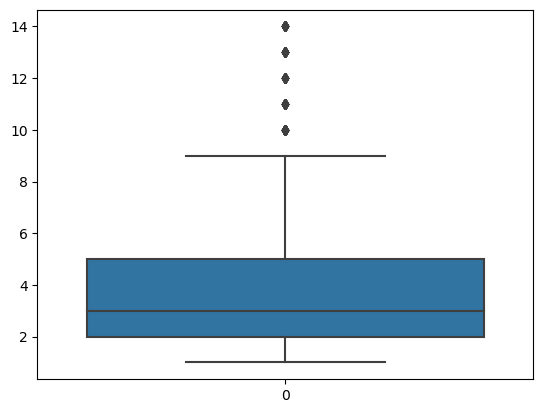

In [33]:
sns.boxplot(data['Quantity'])

In [34]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Month'],
      dtype='object')

## which Sub category having highest Sales and highest profits

<Axes: xlabel='Sub-Category', ylabel='Sales'>

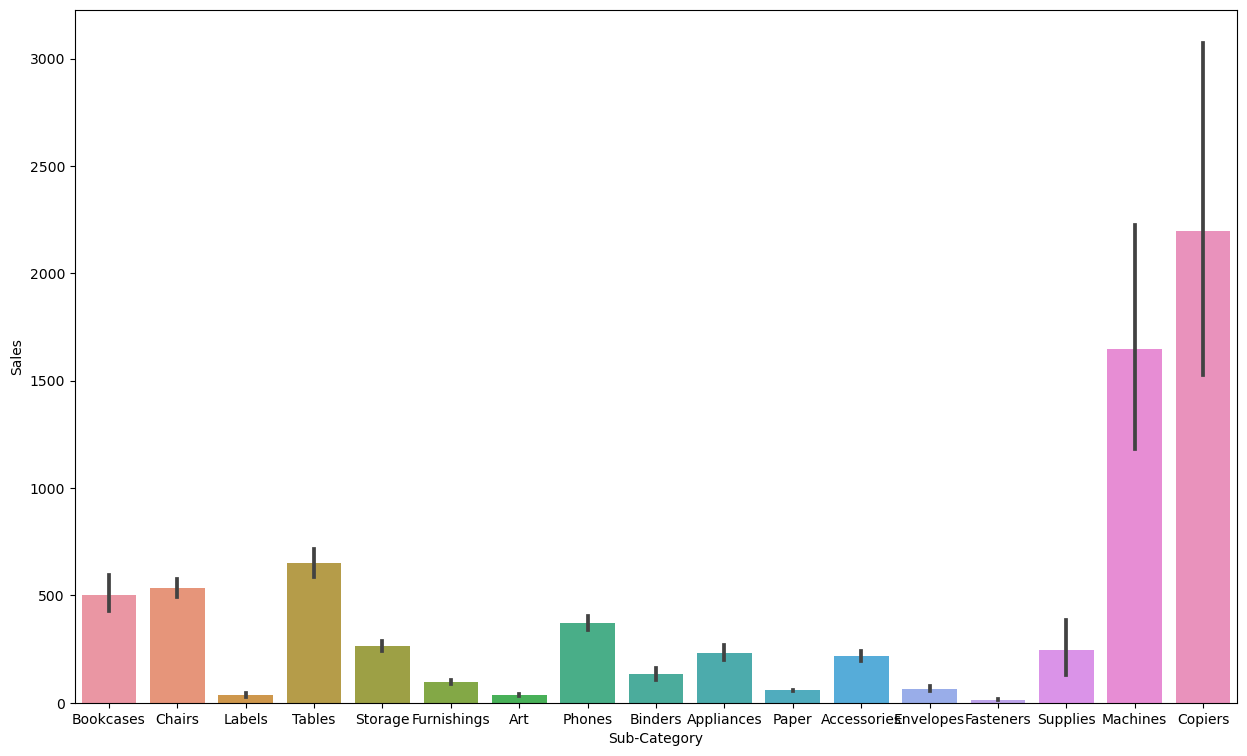

In [36]:
plt.figure(figsize = (15, 9))
sns.barplot(x = data['Sub-Category'], y = data['Sales'])

<Figure size 1500x900 with 0 Axes>

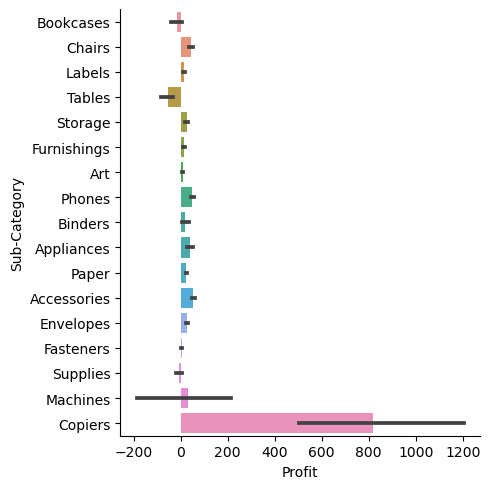

In [40]:
plt.figure(figsize = (15,9))
sns.catplot(y = 'Sub-Category', x = 'Profit', data = data, kind = 'bar')
plt.show()

In [41]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Month'],
      dtype='object')

## Check the correlation between Sales and profit

<Axes: >

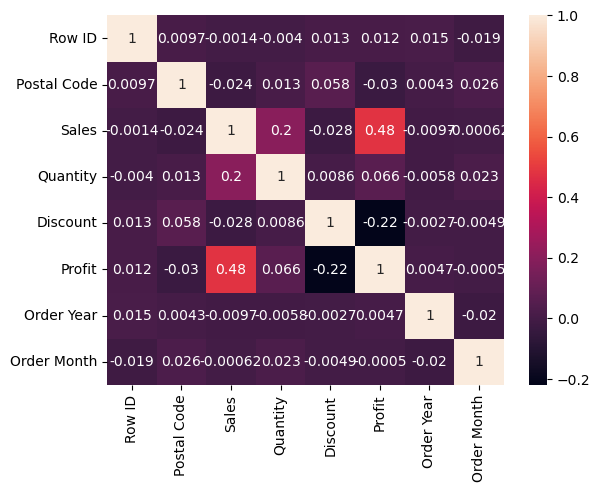

In [42]:
sns.heatmap(data.corr(), annot = True)

## The correlation between Sales and Profit is 0.48

## This indicates that when there is increase in Sales by 1 dollar then profit will increase by 0.48 dollars

In [43]:
### The correlation between yrs of exp and Salary is 0.85

When your Salary increase by 1 ruppee then the yrs of exp will have been increased by 0.85

SyntaxError: invalid syntax (2620306977.py, line 3)